## ANAMOLY DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest


# Load data
df=pd.read_csv(r"C:\Users\rithy\Downloads\anomaly_detection.csv")

#No missing values found
df.isnull().sum()

#Exploring data
df.info()
print(df['remote_access'].value_counts())
print(df['files_downloaded'].value_counts())
print(df['data_accessed_MB'].value_counts())
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   timestamp           505 non-null    object 
 1   user_id             505 non-null    object 
 2   login_duration_min  505 non-null    float64
 3   data_accessed_MB    505 non-null    float64
 4   files_downloaded    505 non-null    int64  
 5   remote_access       505 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 23.8+ KB
remote_access
No     445
Yes     60
Name: count, dtype: int64
files_downloaded
2      118
3      110
4       85
1       79
5       48
6       25
0       20
7       13
8        3
100      1
50       1
9        1
60       1
Name: count, dtype: int64
data_accessed_MB
229.196409    1
221.816183    1
178.529723    1
227.164901    1
175.528028    1
             ..
217.136267    1
166.418832    1
231.033605    1
308.162736    1
123.840655    1


,login_duration_min,data_accessed_MB,files_downloaded
count,505.000000,505.000000,505.000000
mean,30.673913,231.012570,3.384158
std,17.802305,335.673082,5.674272
min,3.000000,5.000000,0.000000
25%,22.742562,172.226144,2.000000
50%,29.809838,206.278823,3.000000
75%,36.296288,238.020733,4.000000
max,300.000000,5000.000000,100.000000



Feature Correlation Matrix (DataFrame):
                    login_duration_min  data_accessed_MB  files_downloaded       Yes
login_duration_min            1.000000          0.490469          0.677467  0.086576
data_accessed_MB              0.490469          1.000000          0.424795  0.191103
files_downloaded              0.677467          0.424795          1.000000  0.078758
Yes                           0.086576          0.191103          0.078758  1.000000


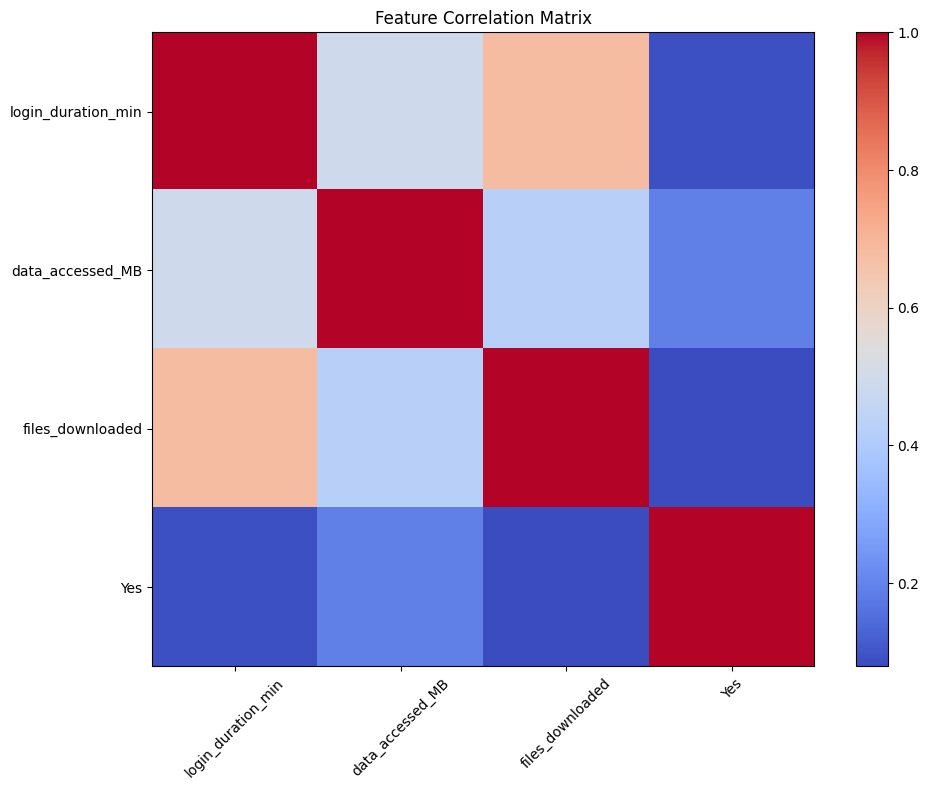

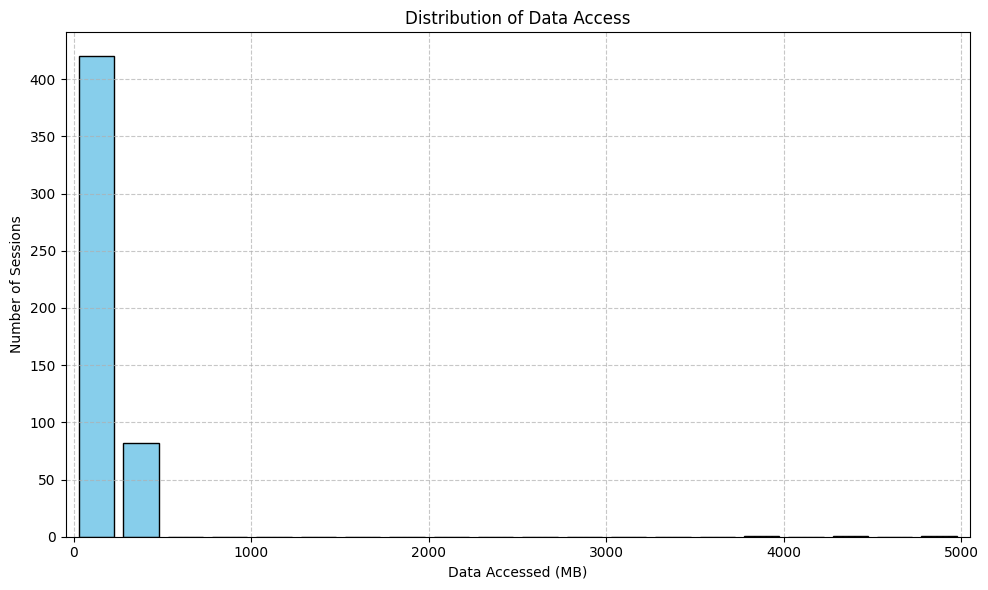

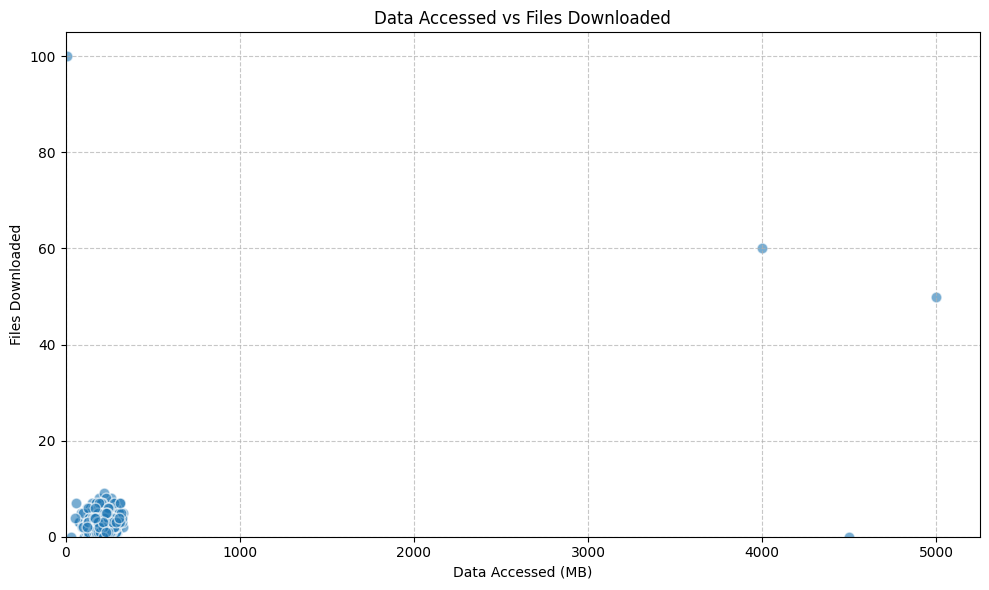

In [6]:
# Converting categorical 'remote_access' to dummy variables for correlation analysis
remote_acc = pd.get_dummies(df['remote_access'], drop_first=True)
df_corr = pd.concat([df.select_dtypes(include=['number']), remote_acc], axis=1)
correlation_df = df_corr.corr()

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)

# Displaying the Correlation Matrix as a DataFrame
print("\nFeature Correlation Matrix:")
print(correlation_df)

# Plotting Heatmap
plt.figure(figsize=(10, 8))
plt.imshow(correlation_df, cmap='coolwarm', aspect='auto')
plt.colorbar()
plt.xticks(range(len(correlation_df.columns)), correlation_df.columns, rotation=45)
plt.yticks(range(len(correlation_df.columns)), correlation_df.columns)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.savefig('correlation_heatmap.png')

# Plotting Histogram with Grid and Appropriate Scales
plt.figure(figsize=(10, 6))
plt.hist(df['data_accessed_MB'], bins=20, rwidth=0.8, color='skyblue', edgecolor='black')
plt.xlabel('Data Accessed (MB)')
plt.ylabel('Number of Sessions')
plt.title('Distribution of Data Access')
plt.grid(True, linestyle='--', alpha=0.7)  # Background Grid
# Setting scale to start slightly before the minimum and end after the maximum
plt.xlim(df['data_accessed_MB'].min() - 50, df['data_accessed_MB'].max() + 50)
plt.tight_layout()
plt.savefig('data_access_histogram.png')

# Plotting Scatter Plot with Grid and Appropriate Scales
plt.figure(figsize=(10, 6))
plt.scatter(df['data_accessed_MB'], df['files_downloaded'], alpha=0.6, edgecolors='w', s=60)
plt.xlabel('Data Accessed (MB)')
plt.ylabel('Files Downloaded')
plt.title('Data Accessed vs Files Downloaded')
plt.grid(True, linestyle='--', alpha=0.7)  # Background Grid
# Setting scales with a 5% margin to ensure data points aren't cut off
plt.xlim(0, df['data_accessed_MB'].max() * 1.05)
plt.ylim(0, df['files_downloaded'].max() * 1.05)
plt.tight_layout()
plt.savefig('scatter_plot.png')

### Statistical methods

In [13]:
#IQR
# SET OPTIONS TO PREVENT WRAPPING
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
# for login_duration_min
Q1=df.login_duration_min.quantile(0.25)
Q3=df.login_duration_min.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
# print outliers
df_IQR_outlier=df[(df.login_duration_min<lower_limit) | (df.login_duration_min>upper_limit)]
print('login_duration_min')
print("Q1 =",lower_limit,"Q3 =",upper_limit)
print(df_IQR_outlier)

# for data_accessed
Q1=df.data_accessed_MB.quantile(0.25)
Q3=df.data_accessed_MB.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_IQR_outlier=df[(df.data_accessed_MB<lower_limit) | (df.data_accessed_MB>upper_limit)]
print('\ndata_accessed_MB')
print("Q1 =",lower_limit,"Q3 =",upper_limit)
print(df_IQR_outlier)

#for files_downloaded
Q1=df.files_downloaded.quantile(0.25)
Q3=df.files_downloaded.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_IQR_outlier=df[(df.files_downloaded<lower_limit) | (df.files_downloaded>upper_limit)]
print('\nfiles_downloaded')
print("Q1 =",lower_limit,"Q3 =",upper_limit)
print(df_IQR_outlier)


login_duration_min
Q1 = 2.4119720423091806 Q3 = 56.626878245392284
               timestamp   user_id  login_duration_min  data_accessed_MB  files_downloaded remote_access
79   2025-04-18 00:00:00  user_033          200.000000          5.000000               100            No
83   2025-04-15 00:00:00  user_036          300.000000       5000.000000                50           Yes
251  2025-04-17 00:00:00  user_032          120.000000       4000.000000                60           Yes
303  2025-04-10 00:00:00  user_002           60.788808        120.804859                 2            No

data_accessed_MB
Q1 = 73.53426089414576 Q3 = 336.7126159550563
               timestamp   user_id  login_duration_min  data_accessed_MB  files_downloaded remote_access
36   2025-04-13 11:00:00  user_008           50.754008         57.572869                 7            No
79   2025-04-18 00:00:00  user_033          200.000000          5.000000               100            No
83   2025-04-15 00:00:00  use

In [14]:
#Z-SCORE
# for login_duration_min
df['zscore']=(df.data_accessed_MB-df.data_accessed_MB.mean())/df.data_accessed_MB.std()
df_ZSCR_outlier=df[(df.zscore<-3)|(df.zscore>3)]
print('login_duration_min')
print(df_ZSCR_outlier)

# for data_accessed
df['zscore']=(df.login_duration_min-df.login_duration_min.mean())/df.login_duration_min.std()
df_ZSCR_outlier=df[(df.zscore<-3)|(df.zscore>3)]
print('\ndata_accessed_MB')
print(df_ZSCR_outlier)

#for files_downloaded
df['zscore']=(df.files_downloaded-df.files_downloaded.mean())/df.files_downloaded.std()
df_ZSCR_outlier=df[(df.zscore<-3)|(df.zscore>3)]
print('\nfiles_downloaded')
print(df_ZSCR_outlier)




login_duration_min
               timestamp   user_id  login_duration_min  data_accessed_MB  files_downloaded remote_access     zscore
83   2025-04-15 00:00:00  user_036               300.0            5000.0                50           Yes  14.207238
251  2025-04-17 00:00:00  user_032               120.0            4000.0                60           Yes  11.228149
314  2025-04-19 00:00:00  user_045                 3.0            4500.0                 0           Yes  12.717694

data_accessed_MB
               timestamp   user_id  login_duration_min  data_accessed_MB  files_downloaded remote_access    zscore
79   2025-04-18 00:00:00  user_033               200.0               5.0               100            No   9.51147
83   2025-04-15 00:00:00  user_036               300.0            5000.0                50           Yes  15.12872
251  2025-04-17 00:00:00  user_032               120.0            4000.0                60           Yes   5.01767

files_downloaded
               timest

### Unsupervised ML method:

In [19]:
#IsolationForest
anomaly_inputs=['login_duration_min','data_accessed_MB']
model_IF=IsolationForest(contamination=0.01,random_state=42)
model_IF.fit(df[anomaly_inputs])
df['anomaly_scores']=model_IF.decision_function(df[anomaly_inputs])
df['anomaly']=model_IF.predict(df[anomaly_inputs])
scores = model_IF.decision_function(df[anomaly_inputs])
df.loc[:,['login_duration_min','data_accessed_MB','anomaly_scores','anomaly']]
df_IF_outlier=df[(df.anomaly_scores<0)]
print(df_IF_outlier)

               timestamp   user_id  login_duration_min  data_accessed_MB  \
79   2025-04-18 00:00:00  user_033               200.0          5.000000   
83   2025-04-15 00:00:00  user_036               300.0       5000.000000   
251  2025-04-17 00:00:00  user_032               120.0       4000.000000   
287  2025-04-01 00:00:00  user_039                 5.0        328.004227   
314  2025-04-19 00:00:00  user_045                 3.0       4500.000000   
355  2025-04-16 00:00:00  user_025                 5.0         30.000000   

     files_downloaded remote_access     zscore  anomaly_scores  anomaly  
79                100            No  17.027001       -0.124248       -1  
83                 50           Yes   8.215298       -0.215570       -1  
251                60           Yes   9.977639       -0.164345       -1  
287                 2            No  -0.243936       -0.000483       -1  
314                 0           Yes  -0.596404       -0.146529       -1  
355                 0  

### Top Suspects:

**user_036**
- **Attributes:** 300 min login, 5000 MB accessed, 50 files downloaded (remote access)
- **Flagged by:** 3 models (Isolation Forest, Z-score, IQR)

**user_032**
- **Attributes:** 120 min login, 4000 MB accessed, 60 files downloaded (remote access)
- **Flagged by:** 3 models (Isolation Forest, Z-score, IQR)

**user_033**
- **Attributes:** 200 min login, 5 MB accessed, 100 files downloaded
- **Flagged by:** 2 models (Isolation Forest, Z-score)

**user_045**
- **Attributes:** 3 min login, 4500 MB accessed, 0 files downloaded (remote access)
- **Flagged by:** 2 models (Isolation Forest, IQR)

**user_025**
- **Attributes:** 5 min login, 30 MB accessed, 0 files downloaded
- **Flagged by:** 2 models (Isolation Forest, IQR)

**user_039 (Record 287)**
- **Attributes:** 5 min login, ~328 MB accessed, 2 files downloaded
- **Flagged by:** 1 model (Isolation Forest only)
